Explore the sky data from Parker

In [29]:
import numpy as np
import desisim.simexp
import specsim.config
import astropy.units as u
# -- local -- 
import env
from feasibgs import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

import dark sky data

In [5]:
dark_sky = np.loadtxt(UT.dat_dir()+'sky/spec-sky.dat', unpack=True, skiprows=2, usecols=[0,1])

(0.5, 20)

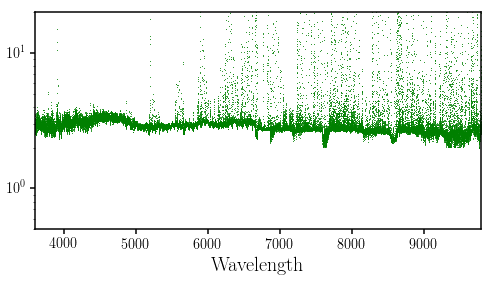

In [116]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
sub.scatter(dark_sky[0], dark_sky[1], c='g', lw=0, s=1.)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_yscale("log")
sub.set_ylim([0.5, 20])

bright sky data

In [14]:
f = UT.dat_dir()+'sky/moon_sky_spectrum.npy'
bright_sky = np.load(f)

ValueError: non-string names in Numpy dtype unpickling